In [1]:
#Importing libraries and the dataset
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()
cluster = pd.read_csv('clustering_means.csv')

In [2]:
cluster

,sigmaritan,energy,danceability,valence,tempo,popularity
0,alex_clefos,0.836610,0.502875,0.405703,128.829043,47.526797
1,andreea_covalevschi,0.710757,0.449651,0.413897,122.500013,39.313646
2,arina_coroliuc,0.586346,0.610177,0.457723,118.518071,54.740581
3,denis_smocvin,0.742059,0.575356,0.442180,123.830053,58.462322
4,eduard_balamatiuc,0.623865,0.677276,0.453297,121.224153,59.803609
5,elena_timbur,0.640411,0.599622,0.482984,120.366621,62.771091
6,irina_tiora,0.522172,0.517497,0.346859,119.570217,43.816817
7,lavinia_spinu,0.780510,0.592216,0.389737,125.034020,55.979167
8,marius_purici,0.642618,0.637237,0.468233,120.448356,61.432612
9,marius_sclearuc,0.666944,0.486100,0.404296,123.612276,39.244978


In [3]:
#Transforming the values in a convenable scale
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(cluster.iloc[:-1,1:])

In [4]:
def draw_silhouette_plot(X,model, n_clusters):
    '''
        This function draw the silhouette plots depending on the model and number of clusters.
    X - the matrix with values
    model - the model used
    n_clusters - number of groups to classify
    '''
    if model == KMeans:
        clusterer = model(n_clusters = n_clusters, random_state=69)
    elif model == GaussianMixture:
        clusterer = GaussianMixture(n_components = n_clusters, random_state=69)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    #Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    #The Silhouette Score ranges from -1 to 1
    plt.xlim([-1, 1])
    #The n_clusters + 1 * 10 is for insterting black space between plots
    #to demarcate them clearly
    plt.ylim([0, len(X) + (n_clusters + 1 ) * 10])
    plt.yticks ([]) # Clear the yaris labels
    plt.xticks ([-1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort ()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                          facecolor=color , edgecolor=color , alpha=0.7)
        # Compute the new y-lower for next plot
        y_lower = y_upper + 10 # 10 for the 0 samples
    # The vertical line for the average silhouette score of all the values
    plt.axvline (x=silhouette_avg, color="red", linestyle="-")
    plt.title(f'The Silhouette Plot for n_clusters = {n_clusters}')
    plt.legend(['Silhouette Score'] + [f'Cluster {i}' for i in range(n_clusters)])


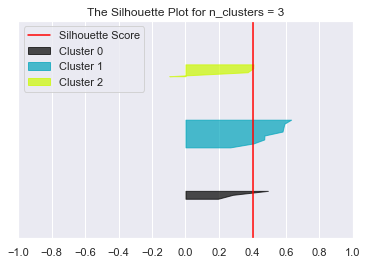

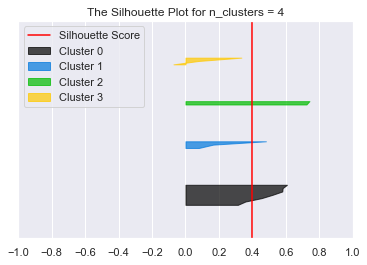

In [5]:
#Plotting Sihlouette Score with KMeans algorithm for n_clusters =  3 and 4 
from pylab import figure
for i, k in enumerate([3, 4]):
    figure(i)
    draw_silhouette_plot(X, KMeans, k)

## These are the mean values for every cluster

In [6]:
#Instantiating KMeans model and fitting on X matrix
kmeans = KMeans(n_clusters=3, random_state=69).fit(X)
#Reverse the Standard Scaling 
centers = scaler.inverse_transform(kmeans.cluster_centers_)
column_names = cluster.iloc[:-1,1:].columns
#View the cluster centers as a pandas table
pd.DataFrame(data=centers, index = [f'K{i}' for i in range(1, centers.shape[0] +1)], columns = column_names)

,energy,danceability,valence,tempo,popularity
K1,0.488832,0.577885,0.361223,118.049721,51.744268
K2,0.655519,0.628087,0.457027,121.283585,56.914347
K3,0.748705,0.507711,0.403408,124.993838,45.516147


In [7]:
#Removing last row
cluster.drop(cluster.tail(1).index,inplace=True)

In [8]:
#Introducing a new column with the id-s for every sigmarigan
cluster['id'] = kmeans.labels_

## This is the dataframe with cluster id-s

In [9]:
cluster

,sigmaritan,energy,danceability,valence,tempo,popularity,id
0,alex_clefos,0.836610,0.502875,0.405703,128.829043,47.526797,2
1,andreea_covalevschi,0.710757,0.449651,0.413897,122.500013,39.313646,2
2,arina_coroliuc,0.586346,0.610177,0.457723,118.518071,54.740581,1
3,denis_smocvin,0.742059,0.575356,0.442180,123.830053,58.462322,1
4,eduard_balamatiuc,0.623865,0.677276,0.453297,121.224153,59.803609,1
5,elena_timbur,0.640411,0.599622,0.482984,120.366621,62.771091,1
6,irina_tiora,0.522172,0.517497,0.346859,119.570217,43.816817,0
7,lavinia_spinu,0.780510,0.592216,0.389737,125.034020,55.979167,2
8,marius_purici,0.642618,0.637237,0.468233,120.448356,61.432612,1
9,marius_sclearuc,0.666944,0.486100,0.404296,123.612276,39.244978,2


In [10]:
#Creating a dictionary, keys - sigmaritan name , values - id-s
id_dict = pd.Series(cluster.id.values,index=cluster.sigmaritan).to_dict()

In [ ]:
id_dict

In [11]:
#Reading initial dataset
df = pd.read_csv('Sigmoid_Spotify_Data_2.csv')

In [12]:
#Mapping through the df the id dictionary
df['id'] = df['sigmaritan'].map(id_dict)

In [13]:
#Creating a new dataframe for every id with different ms values - to reduce the number of artists and only get the most 3 liked
df0 = df[df['msPlayed'] > 65000]
df1 = df[df['msPlayed'] > 60000]
df2 = df[df['msPlayed'] > 120000]

In [14]:
#Separating the id-s in 3 different dataframes
id0_df = df0[df0['id'] == 0]
id1_df = df1[df1['id'] == 1]
id2_df = df2[df2['id'] == 2]

In [15]:
#Introducing a new column that will count the number of songs from the same artist listened to by every sigmaritan
newdf_0 = id0_df.groupby(['sigmaritan' ,'artistName'], as_index=False).agg(freq=('artistName', 'count'))
newdf_1 = id1_df.groupby(['sigmaritan' ,'artistName'], as_index=False).agg(freq=('artistName', 'count'))
newdf_2 = id2_df.groupby(['sigmaritan' ,'artistName'], as_index=False).agg(freq=('artistName', 'count'))

In [16]:
#Choosing only the rows where the freq column value is bigger than a certain number(to get only the 3 most listened to artists)
newdf_0 = newdf_0[newdf_0['freq'] > 6]
newdf_1 = newdf_1[newdf_1['freq'] > 4]
newdf_2 = newdf_2[newdf_2['freq'] > 13]

## The top 3 listened to artists by group

In [17]:
#id-0 (3 persons)
newdf_0['artistName'].value_counts()[:3]

EDEN        3
Avicii      3
Måneskin    3
Name: artistName, dtype: int64

In [18]:
#id-1 (8 persons)
newdf_1['artistName'].value_counts()[:3]

Post Malone        7
Ed Sheeran         7
Imagine Dragons    7
Name: artistName, dtype: int64

In [19]:
#id-2 (4 persons)
newdf_2['artistName'].value_counts()[:3]

Black Sabbath       3
System Of A Down    3
Metallica           3
Name: artistName, dtype: int64

In [20]:
#Vizualizing how many persons are in every cluster
cluster.id.value_counts()

1    8
2    4
0    3
Name: id, dtype: int64

In [21]:
#Loading the genres dataset
genres = pd.read_csv('genreDF.csv')

In [ ]:
#Adding a new column to make the work easier
genres['song'] = genres['artistName'] +' '+ genres['trackName']

In [ ]:
#Removing columns we don't need
genres = genres.drop(['Unnamed: 0','Unnamed: 0.1', 'Freq_Sig', 'artistName', 'trackName'], axis = 1)

In [ ]:
#Creating a dictionary of genres
x = genres.groupby('song').apply(lambda genres: genres.to_dict(orient='list')).to_dict()

In [ ]:
#Trying to get a song's genres
x['Kygo Lose Somebody']['Genre']

In [ ]:
#Creating a new dataframe with songs listened to more than 30 s
df0 = df[df['msPlayed'] > 30000]
#Creating a new dataframe for every id 
id0_df = df0[df0['id'] == 0]
id1_df = df0[df0['id'] == 1]
id2_df = df0[df0['id'] == 2]

In [ ]:
#Adding a new column to make the work easier to every id-dataframe
id0_df['song'] = id0_df['artistName'] +' '+ id0_df['trackName']
id1_df['song'] = id1_df['artistName'] +' '+ id1_df['trackName']
id2_df['song'] = id2_df['artistName'] +' '+ id2_df['trackName']

In [ ]:
#Removing columns 
id0_df = id0_df.drop(['Unnamed: 0','endTime', 'id', 'msPlayed'], axis = 1)
id1_df = id1_df.drop(['Unnamed: 0','endTime', 'id', 'msPlayed'], axis = 1)
id2_df = id2_df.drop(['Unnamed: 0','endTime', 'id', 'msPlayed'], axis = 1)

In [ ]:
#Reseting index
for x in id0_df, id1_df,id2_df:
    x.reset_index(drop =True, inplace=True)

In [ ]:
#New df for every id that will contain every genre for every song
new_df_0 = pd.DataFrame()
new_df_1 = pd.DataFrame()
new_df_2 = pd.DataFrame()

In [ ]:
#Adding a new row with a certain genre for every song in the id-dataframes
for index, row in id1_df.iterrows():
    try:
        for y in x[row['song']]['Genre']:
            new_df_1 = new_df_1.append( {
                'sigmaritan' : row['sigmaritan'],
                'artistName': row['artistName'],
                'trackName': row['trackName'],
                'song' : row['song'],
                'Genre' : y 
            }, ignore_index=True )
    except:
        new_df_1 = new_df_1.append( {
                'sigmaritan' : row['sigmaritan'],
                'artistName': row['artistName'],
                'trackName': row['trackName'],
                'song' : row['song'],
                'Genre' : 'not_found' 
            }, ignore_index=True )
    #print(index,y)


## Most popular 3 genres / group

In [22]:
#Loading the saved datasets
new_df_0 = pd.read_csv('id0_genres.csv')
new_df_1 = pd.read_csv('id1_genres.csv')
new_df_2 = pd.read_csv('id2_genres.csv')

In [23]:
#Group with id-0
new_df_0['Genre'].value_counts()[:4]

pop            7075
modern rock    3628
not_found      3287
rock           2269
Name: Genre, dtype: int64

In [24]:
#Group with id-1
new_df_1['Genre'].value_counts()[:4]

pop                34780
dance pop          23488
russian hip hop    15283
rap                14861
Name: Genre, dtype: int64

In [25]:
#Group with id-2
new_df_2['Genre'].value_counts()[:4]

alternative metal    20444
nu metal             18031
rap metal            13133
rock                 12679
Name: Genre, dtype: int64